In [1]:
import csv
import math

In [2]:
# === Load CSV file & Data Reduction ===
file_path = "dataset.csv"
with open(file_path, "r", newline="", encoding="utf-8") as f:
    reader = csv.reader(f)
    data = list(reader)

# Ambil header dan isi data
header = data[0]
rows = data[1:]

# Kolom yang mau dihapus (Timestamp, Jenis Kelamin, Angkatan, Semester, Status aktivitas, Platform medsos)
drop_indices = [6, 5, 3, 2, 1, 0]

for r in rows:
    for i in drop_indices:
        r.pop(i)

for i in drop_indices:
    header.pop(i)

header = [h.strip() for h in header]

In [3]:
print(f"Total feature: {len(header)}")
print(f"Total row: {len(rows)}\n")

for i in range(len(header)):
    print(f"{i}: {header[i]}")

for i in range(len(header)):
    print(f"{i},", end="")
print()
    
for i in range(len(rows)):
    print(rows[i])

Total feature: 23
Total row: 63

0: IPK terakhir
1: Rata-rata waktu penggunaan media sosial per hari
2: Proporsi konten edukasi dari total waktu sosmed (persepsi)
3: Seberapa sering kamu menggunakan media sosial khusus untuk belajar TI?  (mencari tutorial, debugging video, repo, dsb.)?
4: Seberapa sering kamu terdistraksi (scrolling tidak relevan) selama waktu belajar?
5: Saya menonton tutorial video (YouTube/TikTok) untuk menyelesaikan tugas pemrograman
6: Saya mengikuti Channel/Creator TI (YouTube, Tiktok, Instagram, Discord) untuk materi/topik kursus
7: Saya memakai media sosial untuk mencari solusi debugging
8: Saya menonton konten singkat (reels/TikTok) untuk motivasi belajar atau quick tips
9: Saya bergabung dengan komunitas TI (Discord/Telegram/Reddit)
10: Media sosial mempermudah pemahaman konsep mata kuliah TI
11: Media sosial mempercepat penyelesaian tugas karena ada tutorial/solusi yang relevan
12: Media sosial membantu saya menemukan sumber referensi / repo yang berguna unt

In [4]:
# === cek missing values (semua kolom kategorikal) ===|
total_miss = 0
for row in rows:
    for col_idx in range(len(row)):
        if row[col_idx] == "":
            total_miss += 1
print(f"Total sel dengan missing value: {total_miss}")

Total sel dengan missing value: 0


In [5]:
# === Cek duplikasi data ===
seen = set()
duplicates = []

for row in rows:
    row_tuple = tuple(row)
    if row_tuple in seen:
        duplicates.append(row)
    else:
        seen.add(row_tuple)

# Tampilkan hasil
if duplicates:
    print(f"\nDitemukan {len(duplicates)} baris duplikat:")
    for d in duplicates:
        print(d)
else:
    print("\nTidak ada duplikasi data ditemukan.")


Tidak ada duplikasi data ditemukan.


In [6]:
# Ubah Kolom Pertanyaan menjadi kategori
def encode_kategori(target_col):
    if target_col in header:
        target_index = header.index(target_col)
        
        # ambil semua nilai unik di kolom target
        unique_values = []
        for row in rows:
            value = row[target_index].strip()
            if value not in unique_values:
                unique_values.append(value)
        
        kategori_mapping = {}
        for i, val in enumerate(unique_values):
            kategori_mapping[val] = i
            
        for row in rows:
            row[target_index] = kategori_mapping[row[target_index].strip()]
            
        # Cetak hasil mapping
        print("\n=== Mapping kategori otomatis ===")
        for key, val in kategori_mapping.items():
            print(f"{val}: {key}")
    else:
        print(f"Kolom '{target_col}' tidak ditemukan di header!")

encode_kategori("IPK terakhir")
encode_kategori("Rata-rata waktu penggunaan media sosial per hari")
encode_kategori("Proporsi konten edukasi dari total waktu sosmed (persepsi)")
encode_kategori("Ketika tugas sulit, langkah pertama saya")
encode_kategori("Saya bersedia menggunakan platform campus-official yang mengkurasi konten sosial")


=== Mapping kategori otomatis ===
0: 2.5 - 3.0
1: > 3.5
2: 3.0 - 3.5

=== Mapping kategori otomatis ===
0: > 6 jam
1: 2 - 4 jam
2: 1 - 2 jam
3: 4 - 6 jam

=== Mapping kategori otomatis ===
0: > 70%
1: 0 - 10%
2: 11 - 30%
3: 31 - 50%
4: 51 - 70%

=== Mapping kategori otomatis ===
0: Cari tutorial/Youtube
1: Coba sendiri dulu
2: Tanya AI
3: Baca dokumentasi resmi
4: Tanya teman/Discord

=== Mapping kategori otomatis ===
0: Ya
1: Tidak


In [7]:
print(f"Total feature: {len(header)}")
print(f"Total row: {len(rows)}\n")

for i in range(len(header)):
    print(f"{i}: {header[i]}")

for i in range(len(header)):
    print(f"{i},", end="")
print()
    
for i in range(len(rows)):
    print(rows[i])

Total feature: 23
Total row: 63

0: IPK terakhir
1: Rata-rata waktu penggunaan media sosial per hari
2: Proporsi konten edukasi dari total waktu sosmed (persepsi)
3: Seberapa sering kamu menggunakan media sosial khusus untuk belajar TI?  (mencari tutorial, debugging video, repo, dsb.)?
4: Seberapa sering kamu terdistraksi (scrolling tidak relevan) selama waktu belajar?
5: Saya menonton tutorial video (YouTube/TikTok) untuk menyelesaikan tugas pemrograman
6: Saya mengikuti Channel/Creator TI (YouTube, Tiktok, Instagram, Discord) untuk materi/topik kursus
7: Saya memakai media sosial untuk mencari solusi debugging
8: Saya menonton konten singkat (reels/TikTok) untuk motivasi belajar atau quick tips
9: Saya bergabung dengan komunitas TI (Discord/Telegram/Reddit)
10: Media sosial mempermudah pemahaman konsep mata kuliah TI
11: Media sosial mempercepat penyelesaian tugas karena ada tutorial/solusi yang relevan
12: Media sosial membantu saya menemukan sumber referensi / repo yang berguna unt

In [8]:
import random

def matching_dissimilarity(row1, row2):
    """Hitung jarak (dissimilarity) antar dua baris kategorikal."""
    jarak = 0
    for a, b in zip(row1, row2):
        if a != b:
            jarak += 1
    return jarak

def get_mode_per_column(cluster):
    """Mode per kolom dalam cluster."""
    if not cluster:
        return None
    num_cols = len(cluster[0])
    modes = []
    for col_idx in range(num_cols):
        col_values = [row[col_idx] for row in cluster]
        # pilih nilai yang paling sering muncul
        mode_val = max(set(col_values), key=col_values.count)
        modes.append(mode_val)
    return modes

def kmodes(rows, k=3, max_iter=10000):
    """K-Modes untuk data kategorikal."""
    random.seed(2)
    centroids = random.sample(rows, k)

    for iteration in range(max_iter):
        clusters = [[] for _ in range(k)]

        # Assign
        for row in rows:
            # hitung jarak ke semua centroid
            distances = [matching_dissimilarity(row, c) for c in centroids]
            # ambil index centroid terdekat
            cluster_idx = distances.index(min(distances))
            clusters[cluster_idx].append(row)

        # Update centroids
        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_centroids.append(get_mode_per_column(cluster))
            else:
                new_centroids.append(random.choice(rows))

        # Cek konvergensi
        if new_centroids == centroids:
            break

        centroids = new_centroids

    return clusters, centroids

def kmodes_cost(clusters, centroids):
    """Total dissimilarity (cost) K-Modes."""
    total_cost = 0
    for i, cluster in enumerate(clusters):
        for row in cluster:
            total_cost += matching_dissimilarity(row, centroids[i])
    return total_cost


clusters, centroids = kmodes(rows, k=2, max_iter=100000)
cost = kmodes_cost(clusters, centroids)
print(f"\nTotal cost (dissimilarity): {cost}")



Total cost (dissimilarity): 764


In [9]:
from collections import Counter

def find_non_informative_columns(clusters, centroids, header):
    """
    Kolom yang mode-nya sama di semua cluster → kurang membedakan
    """
    non_informative = []
    for col_idx in range(len(header)):
        values = [cent[col_idx] for cent in centroids]
        if len(set(values)) == 1:
            non_informative.append(header[col_idx])
    return non_informative


def print_column_distribution_kmodes(clusters, header):
    """
    Print distribusi nilai tiap kolom per cluster
    clusters: list of list of rows
    """
    num_cols = len(header)
    for col_idx in range(num_cols):
        print(f"\nKolom: {header[col_idx]}")
        for cluster_idx, cluster in enumerate(clusters):
            values = [row[col_idx] for row in cluster]
            counts = Counter(values)
            print(f" Cluster {cluster_idx}: {dict(counts)}")
            
non_informative_header = find_non_informative_columns(clusters, centroids, header)
print(non_informative_header)
print_column_distribution_kmodes(clusters, header)

['IPK terakhir', 'Proporsi konten edukasi dari total waktu sosmed (persepsi)', 'Media sosial mempercepat penyelesaian tugas karena ada tutorial/solusi yang relevan', 'Media sosial membantu saya menemukan sumber referensi / repo yang berguna untuk tugas proyek', 'Penggunaan media sosial membuat nilai/performaku membaik secara nyata', 'Media sosial lebih sering menjadi sumber distraksi daripada sumber pembelajaran', 'Penggunaan media sosial untuk belajar membuat saya belajar lebih lama dari yang direncanakan (time sink)', 'Saya setuju jika dosen memasukkan konten YouTube/TikTok edukasi resmi sebagai referensi wajib', 'Saya bersedia menggunakan platform campus-official yang mengkurasi konten sosial']

Kolom: IPK terakhir
 Cluster 0: {0: 1, 1: 27, 2: 7}
 Cluster 1: {1: 19, 2: 8, 0: 1}

Kolom: Rata-rata waktu penggunaan media sosial per hari
 Cluster 0: {0: 8, 1: 19, 3: 6, 2: 2}
 Cluster 1: {2: 2, 1: 7, 0: 5, 3: 14}

Kolom: Proporsi konten edukasi dari total waktu sosmed (persepsi)
 Cluster

In [10]:
def data_reduction(header_names):
    """
    Melakukan pengurangan data (Data Reduction).
    """
    for header_name in header_names:
        if header_name in header:
            idx = header.index(header_name)
            for row in rows:
                row.pop(idx)
            header.pop(idx)
            print(f"Kolom '{header_name}' dihapus.")
        else:
            print(f"Kolom '{header_name}' tidak ditemukan di header!")
            
data_reduction(non_informative_header)

Kolom 'IPK terakhir' dihapus.
Kolom 'Proporsi konten edukasi dari total waktu sosmed (persepsi)' dihapus.
Kolom 'Media sosial mempercepat penyelesaian tugas karena ada tutorial/solusi yang relevan' dihapus.
Kolom 'Media sosial membantu saya menemukan sumber referensi / repo yang berguna untuk tugas proyek' dihapus.
Kolom 'Penggunaan media sosial membuat nilai/performaku membaik secara nyata' dihapus.
Kolom 'Media sosial lebih sering menjadi sumber distraksi daripada sumber pembelajaran' dihapus.
Kolom 'Penggunaan media sosial untuk belajar membuat saya belajar lebih lama dari yang direncanakan (time sink)' dihapus.
Kolom 'Saya setuju jika dosen memasukkan konten YouTube/TikTok edukasi resmi sebagai referensi wajib' dihapus.
Kolom 'Saya bersedia menggunakan platform campus-official yang mengkurasi konten sosial' dihapus.



Total cost (dissimilarity): 494


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


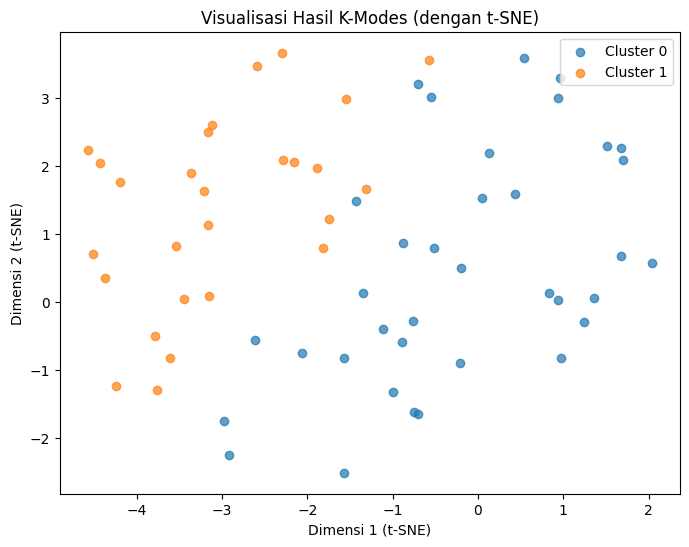

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# --- Jalankan kmodes seperti biasa ---
clusters, centroids = kmodes(rows, k=2, max_iter=10000)
cost = kmodes_cost(clusters, centroids)
print(f"\nTotal cost (dissimilarity): {cost}")

# --- Ubah data kategorikal ke numerik via One-Hot Encoding untuk visualisasi ---
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Flatten semua rows dari cluster
flat_rows = [row for cluster in clusters for row in cluster]
encoded = encoder.fit_transform(flat_rows)

# Buat label cluster (0, 1, 2, ...)
labels = []
for i, cluster in enumerate(clusters):
    labels.extend([i] * len(cluster))
labels = np.array(labels)

# --- Reduksi dimensi ke 2D pakai t-SNE ---
tsne = TSNE(n_components=2, random_state=29, perplexity=30, n_iter=1000)
reduced = tsne.fit_transform(encoded)

# --- Plot visualisasi cluster ---
plt.figure(figsize=(8, 6))
for i in range(len(centroids)):
    plt.scatter(reduced[labels == i, 0], reduced[labels == i, 1], label=f"Cluster {i}", alpha=0.7)
plt.title("Visualisasi Hasil K-Modes (dengan t-SNE)")
plt.xlabel("Dimensi 1 (t-SNE)")
plt.ylabel("Dimensi 2 (t-SNE)")
plt.legend()
plt.show()
